# Quick notebook, needs to be cleaned 

### But the goal is to compare representative brain models genreated by previous notebook code 
* Example: Male vs Female representative brains 

-----------------------------------------------------------------------------------------------

## Import and organize datasets for separate models (i.e. male and female)

In [1]:
#Import Libraries 
#Import all needed libraries 

#Libraries to read and format data
import numpy as np
import pandas as pd

#libraries for genreating figures
%matplotlib ipympl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import kaleido

#Libraries for clustering analysis 
from sklearn.cluster import DBSCAN #import density clustering calculations
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans #kmean clustering analysis
import seaborn as sns #visualizing statistics
from itertools import combinations #Calculating groups combinations at later steps

#Libraries for creating tables
from tabulate import tabulate 
from prettytable import PrettyTable 

#deactivate warning signs that can spam code later in section due to changes in code updates
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import datafiles 
#DEFINE PATH of project folder
my_path = ("C:/Users/Mullo/Documents")
print("PATH (Files Saved to This Location):", my_path)

model1_input_file=  "/f_chat_all_python_ KmeansCentroids_(2023-11-30).csv"
model2_input_file= "/M_chat_all_python_ KmeansCentroids_(2023-11-30).csv"
model1_allDatapoints_inputfile= "/f_chat_all_python_ kmClusterResults_(2023-11-30).csv"
model2_allDatapoints_inputfile= "/M_chat_all_python_ kmClusterResults_(2023-11-30).csv"

#DEFINED project subfolders
output = "/output"
raw_data= "/Raw Data"
output_figures= "/output/Figures"
output_tables= "/output/Tables"
output_datafiles= "/output/DataFiles"

#Setup standard variables for all saved files 
date = pd.to_datetime('now').strftime("%Y-%m-%d")
file_date_name= '({name})'.format(name=date)
print("Date timestamp for files:", file_date_name)

PATH (Files Saved to This Location): C:/Users/Mullo/Documents
Date timestamp for files: (2023-11-30)


### MODEL 1 SPECIFICS

In [3]:
print("Model 1 speciific color and group ID setup")

print("What ID label do you want for MODEL 1?")
m1_ID= input()
print("Model 2:", m1_ID)

print("How Many Groups?")
m1_num= input()
Total_Number_groups= int(m1_num)+1
print("")

group_number_ID= []
for groupN in range (1,Total_Number_groups):
    group_number_ID.append(groupN)
print("Number of groups set=", len(group_number_ID), group_number_ID)
print("")

print("What is the GroupID number for each treatment category? (note: must match analysis file)")
m1_GroupID_set=[]
for ID in range (1, Total_Number_groups):
    output_ID=input(ID)
    m1_GroupID_set.append(output_ID)
print ("Group ID set=", m1_GroupID_set)
print("")

print("What is Treatment Label for each Group ID? (Note: must exactly match text on analysis file)")
m1_TrLabel_set=[]
for Label in range (1, Total_Number_groups):
    output_label=input(Label)
    m1_TrLabel_set.append(output_label)
print("Treatment Labels set=", m1_TrLabel_set)
print("")

print("What color do you want each group/treatment to be coded? Input text code listed in reference figure")
m1_color_code= []
for color in range (1, Total_Number_groups):
    output_color = input(color)
    m1_color_code.append(output_color)
print("Color code set=", m1_color_code)

print("What style of marker do you want for the scatter plots?")
marker_m1style= input()
print("Maker style set:", marker_m1style)

print("What color for plotting do you want to represent the whole dataset (ex- male vs female)?")
color_m1data= input()
print("All group color set:", color_m1data)

print("What COLORMAP for plotting do you want to represent the whole dataset (ex- male vs female)?")
cmap_m1data= input()
print("All group color set:", cmap_m1data)

Model 1 speciific color and group ID setup
What ID label do you want for MODEL 1?


 F


Model 2: F
How Many Groups?


 7



Number of groups set= 7 [1, 2, 3, 4, 5, 6, 7]

What is the GroupID number for each treatment category? (note: must match analysis file)


1 1
2 2
3 3
4 4
5 5
6 6
7 7


Group ID set= ['1', '2', '3', '4', '5', '6', '7']

What is Treatment Label for each Group ID? (Note: must exactly match text on analysis file)


1 1d sal
2 5d sal
3 15d sal
4 1d 2et
5 5d 2et
6 15d 2et
7 1d 4et


Treatment Labels set= ['1d sal', '5d sal', '15d sal', '1d 2et', '5d 2et', '15d 2et', '1d 4et']

What color do you want each group/treatment to be coded? Input text code listed in reference figure


1 indianred
2 chocolate
3 goldenrod
4 palevioletred
5 mediumorchid
6 darkorchid
7 slateblue


Color code set= ['indianred', 'chocolate', 'goldenrod', 'palevioletred', 'mediumorchid', 'darkorchid', 'slateblue']
What style of marker do you want for the scatter plots?


 ^


Maker style set: ^
What color for plotting do you want to represent the whole dataset (ex- male vs female)?


 mediumorchid


All group color set: mediumorchid
What COLORMAP for plotting do you want to represent the whole dataset (ex- male vs female)?


 RdPu


All group color set: RdPu


### MODEL 2 SPECIFICS

In [6]:
print("Model 2 speciific color and group ID setup")

print("What ID label do you want for MODEL 2?")
m2_ID= input()
print("Model 2:", m2_ID)

print("How Many Groups?")
m2_num= input()
Total_Number_groups= int(m2_num)+1
print("")

group_number_ID= []
for groupN in range (1,Total_Number_groups):
    group_number_ID.append(groupN)
print("Number of groups set=", len(group_number_ID), group_number_ID)
print("")

print("What is the GroupID number for each treatment category? (note: must match analysis file)")
m2_GroupID_set=[]
for ID in range (1, Total_Number_groups):
    output_ID=input(ID)
    m2_GroupID_set.append(output_ID)
print ("Group ID set=", m2_GroupID_set)
print("")

print("What is Treatment Label for each Group ID? (Note: must exactly match text on analysis file)")
m2_TrLabel_set=[]
for Label in range (1, Total_Number_groups):
    output_label=input(Label)
    m2_TrLabel_set.append(output_label)
print("Treatment Labels set=", m2_TrLabel_set)
print("")

print("What color do you want each group/treatment to be coded? Input text code listed in reference figure")
m2_color_code= []
for color in range (1, Total_Number_groups):
    output_color = input(color)
    m2_color_code.append(output_color)
print("Color code set=", m2_color_code)

print("What style of marker do you want for the scatter plots?")
marker_m2style= input()
print("Maker style set:", marker_m2style)

print("What color for plotting do you want to represent the whole dataset (ex- male vs female)?")
color_m2data= input()
print("All group color set:", color_m2data)

print("What COLORMAP for plotting do you want to represent the whole dataset (ex- male vs female)?")
cmap_m2data= input()
print("All group color set:", cmap_m2data)

Model 2 speciific color and group ID setup
What ID label do you want for MODEL 2?


 M


Model 2: M
How Many Groups?


 7



Number of groups set= 7 [1, 2, 3, 4, 5, 6, 7]

What is the GroupID number for each treatment category? (note: must match analysis file)


1 1
2 2
3 3
4 4
5 5
6 6
7 7


Group ID set= ['1', '2', '3', '4', '5', '6', '7']

What is Treatment Label for each Group ID? (Note: must exactly match text on analysis file)


1 1d sal
2 5d sal
3 15d sal
4 1d 2et
5 5d 2et
6 15d 2et
7 1d 4et


Treatment Labels set= ['1d sal', '5d sal', '15d sal', '1d 2et', '5d 2et', '15d 2et', '1d 4et']

What color do you want each group/treatment to be coded? Input text code listed in reference figure


1 olive
2 yellowgreen
3 limegreen
4 lightseagreen
5 cadetblue
6 dodgerblue
7 royalblue


Color code set= ['olive', 'yellowgreen', 'limegreen', 'lightseagreen', 'cadetblue', 'dodgerblue', 'royalblue']
What style of marker do you want for the scatter plots?


 D


Maker style set: D
What color for plotting do you want to represent the whole dataset (ex- male vs female)?


 royalblue


All group color set: royalblue
What COLORMAP for plotting do you want to represent the whole dataset (ex- male vs female)?


 ocean


All group color set: ocean


In [7]:
#Import the files of the centroids and/or clusters from representative brain 
set_model1_ID= m1_ID
set_model1_color= color_m1data
set_model1_marker= marker_m1style
set_model2_ID= m2_ID
set_model2_color= color_m2data
set_model2_marker= marker_m2style


model1_data= pd.read_csv(my_path + output_datafiles + model1_input_file)
model1_data.index.names=['centroid']
print("Model 1 filename:", set_model1_ID, ":", model1_input_file)
print(model1_data.head(10))
print("")


model2_data= pd.read_csv(my_path + output_datafiles + model2_input_file)
model2_data.index.names=['centroid']
print("Model 2 filename:", set_model2_ID, ":", model2_input_file)
print(model2_data.head(10))
print("")


model1_clusterdata= pd.read_csv(my_path + output_datafiles + model1_allDatapoints_inputfile)
model1_clusterdata.index.names=['all datapoints']
print("Model 1 filename:", set_model1_ID, ":", model1_allDatapoints_inputfile)
print(model1_clusterdata.head(10))
print("")


model2_clusterdata= pd.read_csv(my_path + output_datafiles + model2_allDatapoints_inputfile)
model2_clusterdata.index.names=['all datapoints']
print("Model 2 filename:", set_model2_ID, ":", model2_allDatapoints_inputfile)
print(model2_clusterdata.head(10))
print("")

Model 1 filename: F : /f_chat_all_python_ KmeansCentroids_(2023-11-30).csv
          cluster ID        ap        dv        ml
centroid                                          
0                  0 -4.697143  3.674286  0.547143
1                  1 -4.747500  4.162500 -0.920000
2                  2 -4.343077  4.144615  1.301538
3                  3 -4.620000  4.115833 -1.427500
4                  4 -4.764000  4.399000  0.872000
5                  5 -4.887692  3.721538 -0.517692
6                  6 -4.278462  4.434615 -1.210000
7                  7 -4.532727  4.182727  1.480000
8                  8 -5.030000  4.300000 -0.495000
9                  9 -4.887500  3.982500  0.415833

Model 2 filename: M : /M_chat_all_python_ KmeansCentroids_(2023-11-30).csv
          cluster ID        ap        dv        ml
centroid                                          
0                  0 -4.872000  3.998000 -0.704000
1                  1 -4.740000  4.193333  1.153333
2                  2 -4.358571  4

## Create dataframe of xyz variables depending on model 1 or model 2 number 

In [8]:
#Create list of numbers based on size of dataframe 
model1_labels=[]
model1_color= []
model1_marker=[]
for sz in range (0, len(model1_data)):
    input_label= set_model1_ID
    input_color= set_model1_color
    input_marker= set_model1_marker
    model1_labels.append(input_label)
    model1_color.append(input_color)
    model1_marker.append(input_marker)

model2_labels=[]
model2_color=[]
model2_marker=[]
for sz in range (0, len(model2_data)):
    input_label= set_model2_ID
    input_color= set_model2_color
    input_marker= set_model2_marker
    model2_labels.append(input_label)
    model2_color.append(input_color)
    model2_marker.append(input_marker)

#Create a dataframe column with the new labels 

model1_data['model label']= model1_labels
model1_data['model colorcode']= model1_color
model1_data['model marker']= model1_marker


model2_data['model label']= model2_labels
model2_data['model colorcode']= model2_color
model2_data['model marker']= model2_marker

#Combine all models into a single dataframe for further analysis 
All_modeldata= pd.concat([model1_data, model2_data], ignore_index=True)
All_modeldata.index.names=['centroid datapoint']
All_modeldata
print(All_modeldata)
#########################################
#Save datafile: 
#Save updated dataset with cluster analysis to path
print("Saved File Timestamp:", file_date_name)

save_results_to = my_path + output_datafiles
print("File saved to computer folder:", save_results_to)
All_modeldata.to_csv(save_results_to + "_compare-repbrainmodels-allCentroids_" + file_date_name + '.csv', index=False)

                    cluster ID        ap        dv        ml model label  \
centroid datapoint                                                         
0                            0 -4.697143  3.674286  0.547143           F   
1                            1 -4.747500  4.162500 -0.920000           F   
2                            2 -4.343077  4.144615  1.301538           F   
3                            3 -4.620000  4.115833 -1.427500           F   
4                            4 -4.764000  4.399000  0.872000           F   
...                        ...       ...       ...       ...         ...   
1243                       523 -4.776000  4.236000 -0.918000           M   
1244                       524 -4.147500  4.305000  1.015000           M   
1245                       525 -4.320000  4.145000 -1.595000           M   
1246                       526 -4.340000  4.273333  0.750000           M   
1247                       527 -4.560000  4.620000 -0.790000           M   

           

In [9]:
#Create list of numbers based on size of dataframe 
model1_labels=[]
model1_color= []
model1_marker=[]
for sz in range (0, len(model1_clusterdata)):
    input_label= set_model1_ID
    input_color= set_model1_color
    input_marker= set_model1_marker
    model1_labels.append(input_label)
    model1_color.append(input_color)
    model1_marker.append(input_marker)

model2_labels=[]
model2_color=[]
model2_marker=[]
for sz in range (0, len(model2_clusterdata)):
    input_label= set_model2_ID
    input_color= set_model2_color
    input_marker= set_model2_marker
    model2_labels.append(input_label)
    model2_color.append(input_color)
    model2_marker.append(input_marker)

#Create a dataframe column with the new labels 

model1_clusterdata['model label']= model1_labels
model1_clusterdata['model colorcode']= model1_color
model1_clusterdata['model marker']= model1_marker


model2_clusterdata['model label']= model2_labels
model2_clusterdata['model colorcode']= model2_color
model2_clusterdata['model marker']= model2_marker

#Combine all models into a single dataframe for further analysis 
All_modeldata_cluster= pd.concat([model1_clusterdata, model2_clusterdata], ignore_index=True)
All_modeldata_cluster.index.names=['all clusterID datapoint']
All_modeldata_cluster
print(All_modeldata_cluster)

#######################################################################
#Save datafile: 
#Save updated dataset with cluster analysis to path
print("Saved File Timestamp:", file_date_name)

save_results_to = my_path + output_datafiles
print("File saved to computer folder:", save_results_to)
All_modeldata_cluster.to_csv(save_results_to + "_compare-repbrainmodels-allclusterdatapoints_" + file_date_name + '.csv', index=False)

                         section_ap    dv    ml  groups  km_cluster_id  \
all clusterID datapoint                                                  
0                             -5.08  4.29 -1.11       6            698   
1                             -5.08  4.33 -1.11       6            698   
2                             -5.07  4.35 -1.07       6            698   
3                             -5.07  4.44 -1.06       6            383   
4                             -5.07  4.35 -1.05       6            698   
...                             ...   ...   ...     ...            ...   
8734                          -4.32  4.20  1.50       1             32   
8735                          -4.32  4.22  1.51       1             32   
8736                          -4.32  4.18  1.52       1             32   
8737                          -4.32  3.86  1.53       1             55   
8738                          -4.32  3.73  1.61       1            418   

                        model label m

**____________________________________________________________**

# Visualize and calculate differences in models

## Spread of all model datapoints in 3D space
##### edit note- put in variable for model markers

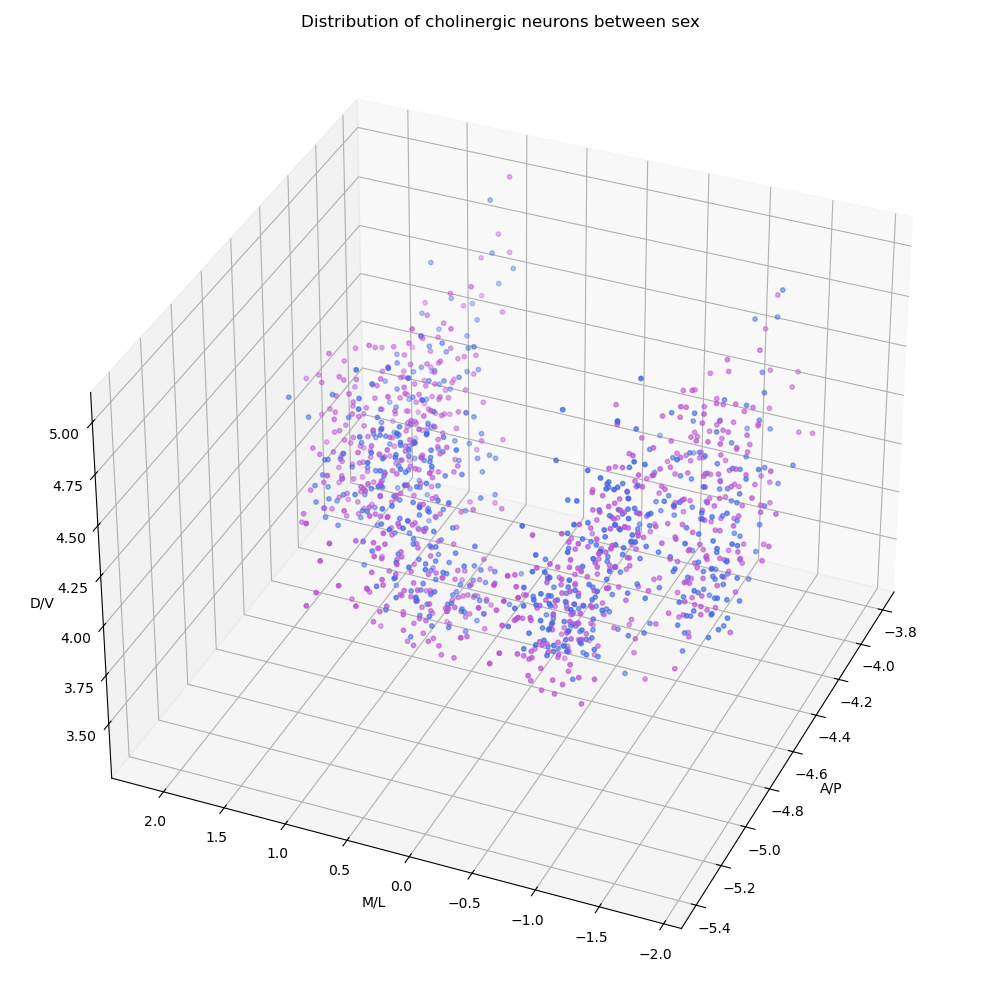

Figure saved: Distribution of cholinergic neurons between sex
Saved File Timestamp: (2023-11-30)
File Saved to computer folder: C:/Users/Mullo/Documents/output/Figures


In [11]:
FigureTitle = "Distribution of cholinergic neurons between sex"
FigureDetail= "3D scatter of all neurons bw sex"

#create 3D scatterpoint of models 

#Create array to make ploting easier 
alldata_forplot = All_modeldata[['ap','dv','ml','model label','model colorcode', 'model marker']].values

#Generate the 3D plot outline and plot size
FigureTitle = "Distribution of cholinergic neurons between sex"
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig_compare = plt.figure()
ax_cp = fig_compare.add_subplot(projection="3d")

#Define each axis value and plot based on groups
x_cp = alldata_forplot[:, 0].tolist() 
y_cp = alldata_forplot[:, 2].tolist() 
z_cp = alldata_forplot[:, 1].tolist() 
colorcode= alldata_forplot[:,4].tolist()
marker_style= 'o'
marker_size= 10

#set figure axis to correct variable name 
ax_cp.set_xlabel('A/P')
ax_cp.set_ylabel('M/L')
ax_cp.set_zlabel('D/V')
plt.title(FigureTitle)

#create scatterpoint, with set colorscheme
compare_models = ax_cp.scatter(x_cp, y_cp, z_cp, marker=marker_style, s=marker_size, c=colorcode)
ax_cp.view_init(elev=34, azim=-157, roll=0) #angle2
plt.show(compare_models)

##################################################################
#Save Figure File to path folder
print("Figure saved:", FigureTitle)
print("Saved File Timestamp:", file_date_name)

save_results_to = (my_path + output_figures)
print("File Saved to computer folder:", save_results_to)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name +'.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name +'.png', dpi = 600)


### TODO- add cross section of dataset

_____________________________________________________________________________________________________________________________

## Split model datasets into separate dataset for comparrisons analysis 

In [12]:
#Split dataframe of model1 and model2 cluster datapoint values for calculation 
model1_only= All_modeldata_cluster.groupby(['model label']).get_group(set_model1_ID)
model2_only= All_modeldata_cluster.groupby(['model label']).get_group(set_model2_ID)

## Visualize range of a-p axis represented in each model (2D)

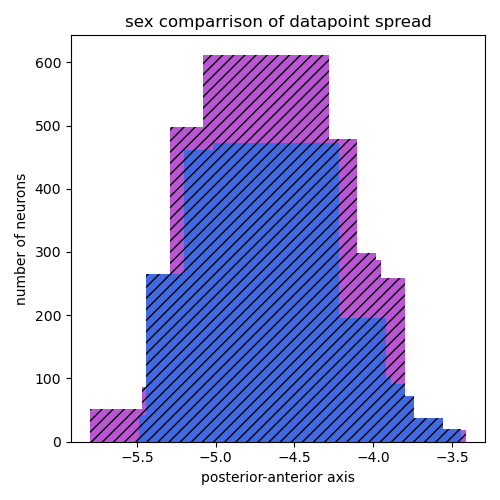

Figure saved: sex comparrison of datapoint spread
Saved File Timestamp: (2023-11-30)
File Saved to computer folder: C:/Users/Mullo/Documents/output/Figures


In [13]:
FigureTitle='sex comparrison of datapoint spread' #Put in title name for figure
FigureDetail='histogram ap range by sex'

#get a-p range between all male and female datapoints to define x axis range 
ap_sort_all= All_modeldata_cluster.sort_values(by=['section_ap'])
ap_range_all= ap_sort_all['section_ap'].unique().tolist() #Variable defining range of x axis

#calculate the number of a-p sections spearate in male and female datasets (x-axis)
ap_sort_model1=  model1_only.sort_values(by=['section_ap'])
model1_range= ap_sort_model1['section_ap'].unique().tolist() #model1 x-variable

ap_sort_model2=  model2_only.sort_values(by=['section_ap'])
model2_range= ap_sort_model2['section_ap'].unique().tolist() #model2 x-variable

#calculate number datapoints for both male and female sectiosn (y-axis)
model1_npoints= ap_sort_model1.groupby(['section_ap'])['model label'].count().tolist() #model1 Y-value
model2_npoints= ap_sort_model2.groupby(['section_ap'])['model label'].count().tolist() #model2 Y-value

#Get color code information for plotting of each model 
model1_color= model1_only['model colorcode'].unique()
model2_color= model2_only['model colorcode'].unique()

#step 4: plot male and female curve on same barplot with color coding 

fig_apcomp, ax_apcomp = plt.subplots(figsize =(5, 5)) #Set figure variales and figure size for viewing 
ax_apcomp.set_ylabel('number of neurons') #Create Y-axis label title
ax_apcomp.set_xlabel('posterior-anterior axis') #Creat x-axis label
ax_apcomp.set_title(FigureTitle) #Create figure title
ax_apcomp.bar(model1_range, model1_npoints, color=set_model1_color, label=set_model1_ID, hatch='///')
ax_apcomp.bar(model2_range, model2_npoints, color=set_model2_color, label=set_model2_ID, hatch='///')
plt.show() #Show Plot
ax_apcomp.legend(title='sex')

#######################################
#Save Figure File to path folder
print("Figure saved:", FigureTitle)
print("Saved File Timestamp:", file_date_name)

save_results_to = (my_path + output_figures)
print("File Saved to computer folder:", save_results_to)
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name +'.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name +'.png', dpi = 600)


## Visualize: size of cluster input points per cluster based on cluster number (compare between models)

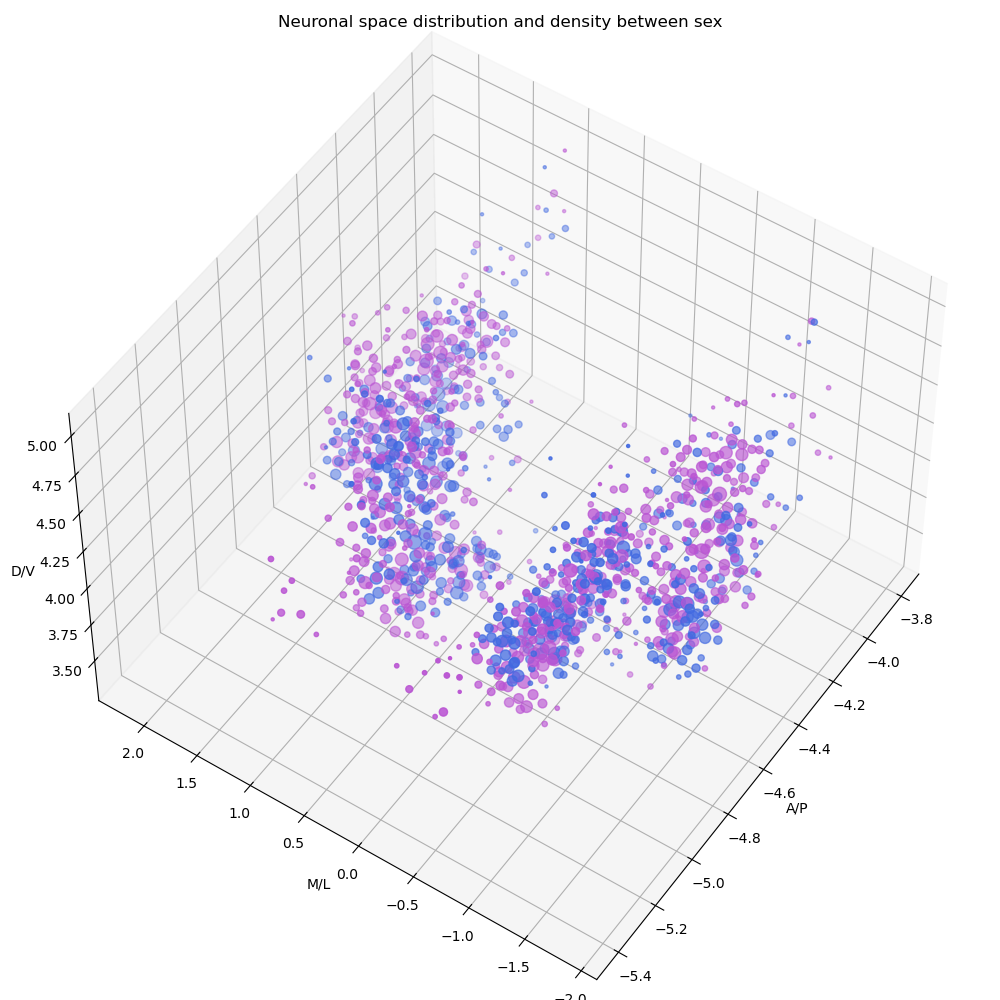

Figure saved: Neuronal space distribution and density between sex
Saved File Timestamp: (2023-11-30)
Figure saved to computer file: C:/Users/Mullo/Documents/output/Figures


In [20]:
FigureTitle = "Neuronal space distribution and density between sex"
FigureDetail="3D scatter sex diff with cluster density angle12"
#Calcuate number of cluster points in each dataset, to generate the size value for figure 
model1_sortID= model1_only.sort_values(by=['km_cluster_id'])
nPoint_model1= model1_sortID.groupby(['km_cluster_id'])['ml'].count().tolist() #number of datapoints in each cluster

model2_sortID= model2_only.sort_values(by=['km_cluster_id'])
nPoint_model2= model2_sortID.groupby(['km_cluster_id'])['ml'].count().tolist()

#combine the list of nPoints into one variable in order to make graphing easier. 
#It should be the exact same size as the coordinate datapoints of the other variables 
#If not something went wrong 
alldata_size= nPoint_model1 + nPoint_model2

#input these variables into the figure as the size variable 


alldata_forplot = All_modeldata[['ap','dv','ml','model label','model colorcode', 'model marker']].values
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig_size = plt.figure()
ax_size = fig_size.add_subplot(projection="3d")
ax_size.set_xlabel('A/P')
ax_size.set_ylabel('M/L')
ax_size.set_zlabel('D/V')
plt.title(FigureTitle)

#Define Variables for plotting:
x_cp = alldata_forplot[:, 0].tolist() 
y_cp = alldata_forplot[:, 2].tolist() 
z_cp = alldata_forplot[:, 1].tolist() 
colorcode= alldata_forplot[:,4].tolist()
marker_style= alldata_forplot[:,5].tolist()

#scale size variable for visualization 
scale_increase= 5

size_scaled= []
for up in range (0, len(alldata_size)):
    input_change= alldata_size[up] * scale_increase
    size_scaled.append(input_change)

#create scatterpoint, with new size variable
compare_models_size = ax_size.scatter(x_cp, y_cp, z_cp, marker='o', s=size_scaled, color=colorcode, cmap=colorcode)
#ax_size.view_init(elev=63, azim=-179, roll=0) #angle1
ax_size.view_init(elev=51, azim=-146, roll=0)#angle2
plt.show(compare_models_size)
#ax_cp.legend(handle=[colorcode], title= "sex" ,fancybox=True) #fix legend later


#making background transparent 
# make the panes transparent
#ax_tc.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax_tc.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax_tc.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax_size.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax_size.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax_size.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

#######################################################################
#Save Figure File to path folder
print("Figure saved:", FigureTitle)
print("Saved File Timestamp:", file_date_name)

save_results_to = my_path + output_figures
print("Figure saved to computer file:", save_results_to)
#Figure name will include the dataset and figure name genreated, as well as timpestamp
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name +'.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name +'.png', dpi = 600)

### Make 2D crossection of this dataset
* note: needs to be updated with model 1 and model 2 specifics. Skipping to save time for now 

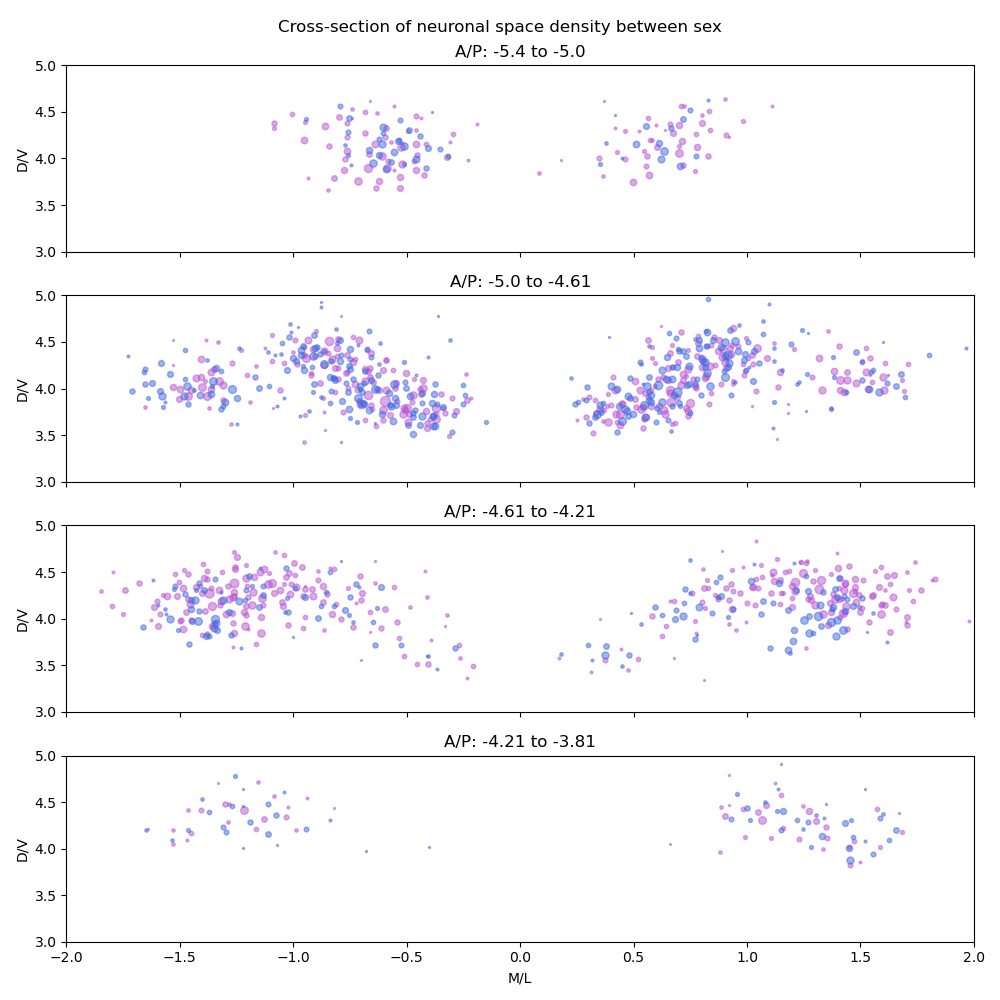

Figure saved: Cross-section of neuronal space density between sex
Saved File Timestamp: (2023-11-30)
Figure saved to computer file: C:/Users/Mullo/Documents/output/Figures


In [15]:
FigureTitle= 'Cross-section of neuronal space density between sex'
FigureDetail= 'cross section of sex differ cluster density'

#create figure- 8 subplots over 4 sections, compare between model1 and model2
fig_crossx, ax_crossx= plt.subplots(4,1, sharey='all', sharex='col')
fig_crossx.suptitle(FigureTitle)

#sort a-p range 
all_ap_range=All_modeldata_cluster.sort_values(by='section_ap')['section_ap'].unique()
#get axis range info 
min_ap= min(all_ap_range)
max_ap= max(all_ap_range)
min_ml= round(min(All_modeldata_cluster['ml'].unique()))    
max_ml= round(max(All_modeldata_cluster['ml'].unique()))
min_dv= round(min(All_modeldata_cluster['dv'].unique()))    
max_dv= round(max(All_modeldata_cluster['dv'].unique()))
section_range= round(abs(min_ap - max_ap), 2)

#create section subplots
cross_step= 0.2
number_subplots=4
count_num_section= round( (section_range) / cross_step)
find_step= (section_range)/(number_subplots)

ap_all_cross= []
for letsgo in range (0, number_subplots+1):
    ap_value= min_ap + (letsgo*find_step)
    ap_all_cross.append(ap_value)

#create subplot variables 
sct1L=ax_crossx[0]
sct1L.set_xlim(min_ml, max_ml)
sct1L.set_ylim(min_dv, max_dv)
sct1L.set_ylabel('D/V')
sct1L.set_title(f"A/P: {round(ap_all_cross[0],2)} to {round(ap_all_cross[1],2)}")

sct2L= ax_crossx[1]
sct2L.set_title(f"A/P: {round(ap_all_cross[1],2)} to {round(ap_all_cross[2],2)}")
sct2L.set_ylabel('D/V')

sct3L= ax_crossx[2]
sct3L.set_ylabel('D/V')
sct3L.set_title(f"A/P: {round(ap_all_cross[2],2)} to {round(ap_all_cross[3],2)}")

sct4L= ax_crossx[3]
sct4L.set_title(f"A/P: {round(ap_all_cross[3],2)} to {round(ap_all_cross[4],2)}")
sct4L.set_ylabel('D/V')
sct4L.set_xlabel('M/L')

#make the figure for both models 
marker_input= 'o'
alpha_input= 0.5
size_increase= 2
for tehee in range (0, len(x_cp)):
    plot_ref_section= x_cp[tehee]
    x_ml= y_cp[tehee]
    y_dv= z_cp[tehee]
    new_size= alldata_size[tehee] * size_increase
    new_color= colorcode[tehee]
    #new_marker= marker_style[tehee]
    new_marker= 'o'
    if (plot_ref_section>= ap_all_cross[0]) and (plot_ref_section<= ap_all_cross[1]):
        sct1L.scatter(x_ml, y_dv, c=new_color, s=new_size, alpha=alpha_input, marker=new_marker, cmap=new_color)
    elif (plot_ref_section>= ap_all_cross[1]) and (plot_ref_section<= ap_all_cross[2]):
        sct2L.scatter(x_ml, y_dv, c=new_color, s=new_size, alpha=alpha_input, marker=new_marker, cmap=new_color)
    elif (plot_ref_section>= ap_all_cross[2]) and (plot_ref_section<= ap_all_cross[3]):
        sct3L.scatter(x_ml, y_dv, c=new_color, s=new_size, alpha=alpha_input, marker=new_marker, cmap=new_color)
    elif (plot_ref_section>= ap_all_cross[3]) and (plot_ref_section<= ap_all_cross[4]):
        sct4L.scatter(x_ml, y_dv, c=new_color, s=new_size, alpha=alpha_input, marker=new_marker, cmap=new_color)
    else:
        pass
plt.show()
#######################################################################
#Save Figure File to path folder
print("Figure saved:", FigureTitle)
print("Saved File Timestamp:", file_date_name)

save_results_to = my_path + output_figures
print("Figure saved to computer file:", save_results_to)
#Figure name will include the dataset and figure name genreated, as well as timpestamp
plt.savefig(save_results_to +  "_ Figure_" + FigureDetail + file_date_name +'.pdf', dpi = 600)
plt.savefig(save_results_to + "_ Figure_" + FigureDetail + file_date_name +'.png', dpi = 600)

**____________________________________________**

### ToDo: boxplot of cross section for comparrison 

#### note- this section is a mess and needs to be updated 

#### note- histogram got to complicated so going to skip for now 

In [16]:
#For histograms- separate out male and female dataets, divide between L and R hemispehres, and pull out cross section values. 

#dataset= All_modeldata
#inputdataset= All_modeldata
#print(All_modeldata)

#set ranges
#sd_minml= round(min(All_modeldata['ml']), 2)
#sd_maxml= round(max(All_modeldata['ml']), 2)
#sd_mindv= round(min(All_modeldata['dv']), 2)
#sd_maxdv= round(max(All_modeldata['dv']), 2)
#sd_minap= round(min(All_modeldata['ap']), 2)
#sd_maxap= round(max(All_modeldata['ap']), 2)

#Now make model-specific format variables 
#mID_options= All_modeldata['model label'].unique().tolist()
#mcolor_options= All_modeldata['model colorcode'].unique().tolist()
#mmarker_options=  All_modeldata['model marker'].unique().tolist()

########################################################################################
#Individual cross section values= section 1
#FigureTitle= "Sex difference histogram in cross section 1"
#fig_sd1, ax_histsd1= plt.subplots(4, sharey='all')
#fig_sd1.suptitle(FigureTitle)

#topleft1=ax_histsd1[0]
#topleft1.set_xlim(min_ml, 0)
#topleft1.set_title("ML distribution, left")
#topleft1.set_ylabel('number of neurons')
#sideleft1=ax_histsd1[1]
#sideleft1.set_xlim(min_dv, max_dv)
#sideleft1.set_title("DV distribution, left")
#sideleft1.set_ylabel('number of neurons')
#topright1= ax_histsd1[2]
#topright1.set_xlim(0, max_ml)
#topright1.set_title("ML distribution, right")
#topright1.set_ylabel('number of neurons')
#sideright1=ax_histsd1[3]
#sideright1.set_xlim(min_dv, max_dv)
#sideright1.set_title("DV distribution, right")
#sideright1.set_ylabel('number of neurons')

#create histogram based on group/treatment number and color

#topL= topleft1
#sideL= sideleft1
#topR= topright1
#sideR= sideright1

#for superman in range (0, len(inputdataset)):
    #model_ref= inputdataset['model label'][superman]
    #for tarzan in range (0, len(mID_options)):
        #plot_model= mID_options[tarzan]
        #plot_color= mcolor_options [tarzan]
        #plot_marker= mmarker_options [tarzan]
        #if model_ref == plot_model:
            #data_forplot= inputdataset.groupby('model label').get_group(plot_model)
            #for amazon in range (0, len(data_forplot)):
                #ml_plot= data_forplot['ml'][amazon]
                #dv_plot= data_forplot['dv'][amazon]
                #ap_ref= data_forplot['ap'][amazon]
                #if (ml_plot > 0) and (ap_ref= section_num:
                    #plot on topL 
                #if ml_plot <= 0
                    #plot on top R
